In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 109394
df = MongoBlotter().read()
df.tail(20)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
238,5f2cd104742970f0680dbd20,2020-08-07 05:56:52.729,2020-08-07 03:56:52.716,YM SEP 20,SELL,2.0,27138.000000,[0000e1a7.5f2c9797.01.01],1267,137107226,STOP-LOSS,4.20,-838.40
239,5f2cd104742970f0680dbd21,2020-08-07 05:56:52.960,2020-08-07 03:56:52.957,MYM SEP 20,SELL,2.0,27137.000000,[0000e1a7.5f2c9798.01.01],1268,137107227,STOP-LOSS,0.94,-85.88
240,5f2cd258742970f0680dbd2a,2020-08-07 06:02:32.886,2020-08-07 04:02:32.883,MESU0,SELL,2.0,3324.750000,[0000e1a7.5f2c983c.01.01],1240,1878774965,STOP-LOSS,0.94,-1.88
241,5f2d1b98742970f0680dbe23,2020-08-07 11:15:04.036,2020-08-07 09:15:04.033,ESU0,SELL,2.0,3324.250000,[0000e1a7.5f2cb8a4.01.01],1239,1878774964,STOP-LOSS,4.20,-58.40
242,5f2d6f2349ce4219115b40bf,2020-08-07 17:11:31.804,2020-08-07 15:11:31.798,YM SEP 20,BUY,2.0,27279.000000,[0000e1a7.5f2d0f3a.01.01],1229,1627217004,ENTRY,4.20,0.00
243,5f2d6f2449ce4219115b40c0,2020-08-07 17:11:32.514,2020-08-07 15:11:32.513,MYM SEP 20,BUY,2.0,27279.000000,[0000e1a7.5f2d0f41.01.01],1230,1627217007,ENTRY,0.94,0.00
244,5f2d8bbb49ce4219115b4121,2020-08-07 19:13:31.078,2020-08-07 17:13:30.976,GCZ0,SELL,1.0,2031.200000,[0000e1a7.5f2d3c21.01.01],1233,1627217013,ENTRY,2.42,0.00
245,5f2d8bcd49ce4219115b4122,2020-08-07 19:13:49.473,2020-08-07 17:13:49.317,MGCZ0,SELL,3.0,2031.033333,"[0000e1a7.5f2d3c39.01.01, 0000e1a7.5f2d3c43.01...",1234,1627217016,ENTRY,1.41,0.00
246,5f2d948449ce4219115b4143,2020-08-07 19:51:00.708,2020-08-07 17:51:00.705,NQU0,SELL,1.0,11083.000000,[0000e1a7.5f2d4bde.01.01],1237,1627217024,ENTRY,2.10,0.00
247,5f2d949049ce4219115b4144,2020-08-07 19:51:12.290,2020-08-07 17:51:12.284,MNQU0,SELL,7.0,11080.571429,"[0000e1a7.5f2d4bdf.01.01, 0000e1a7.5f2d4c10.01...",1238,1627217027,ENTRY,3.29,0.00


In [3]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [4]:
df.tail()

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2020-08-07 18:24:06.057,2020-08-07 20:24:06.152,NQ,SELL,0.6,11039.50,1242,ENTRY,2.82,0.00,130684.65
2020-08-07 18:34:54.211,2020-08-07 20:34:54.213,NQ,BUY,1.0,11068.00,1243,STOP-LOSS,2.10,-604.20,130080.45
2020-08-07 18:35:01.088,2020-08-07 20:35:01.129,NQ,BUY,0.6,11068.25,1244,STOP-LOSS,2.82,-350.64,129729.81
2020-08-07 19:48:01.049,2020-08-07 21:48:01.052,ES,BUY,2.0,3344.25,1245,ENTRY,4.20,0.00,129729.81
2020-08-07 19:48:01.148,2020-08-07 21:48:01.150,ES,BUY,0.2,3344.25,1246,ENTRY,0.94,0.00,129729.81


In [5]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])

In [6]:
allocs

YM       0.25
NQ       0.25
GC       0.25
ES       0.25
total    1.00
dtype: float64

In [7]:
df.groupby('contract').realizedPNL.sum()

contract
ES     495.630000
GC    9122.600001
NQ    7384.019999
YM    3333.560000
Name: realizedPNL, dtype: float64

In [8]:
df.realizedPNL.sum()

20335.81

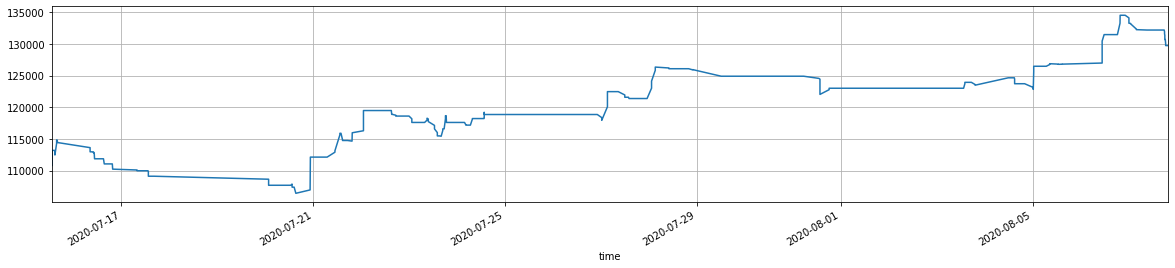

In [9]:
df.cash.plot(figsize=(20,4), grid=True);

In [10]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [11]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     32
 GC     78
 NQ    124
 YM     24
 Name: action, dtype: int64, 258)

In [12]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    1.777778
 GC    4.333333
 NQ    6.888889
 YM    1.333333
 Name: action, dtype: float64, 14.333333333333334)

In [13]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     87.25
GC    222.05
NQ    213.86
YM     67.16
Name: commission, dtype: float64

In [14]:
df.commission.sum()

590.3199999999999

In [15]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
YM,0.33,368.45,2049.45,-472.04,4.34,360.05,12.1
NQ,0.35,184.95,1416.07,-492.16,2.88,175.72,39.7
ES,0.38,42.74,1081.57,-580.55,1.86,51.06,16.3
GC,0.36,260.81,1438.38,-398.62,3.61,262.70,36.0
total,0.36,207.32,1434.30,-472.70,3.03,213.82,104.1


In [16]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [17]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,0.129831,-0.346042,0.542365,0.418376
GC,0.129831,1.000000,0.056566,-0.057017,0.571655
NQ,-0.346042,0.056566,1.000000,0.116912,0.536055
YM,0.542365,-0.057017,0.116912,1.000000,0.627661
total,0.418376,0.571655,0.536055,0.627661,1.000000


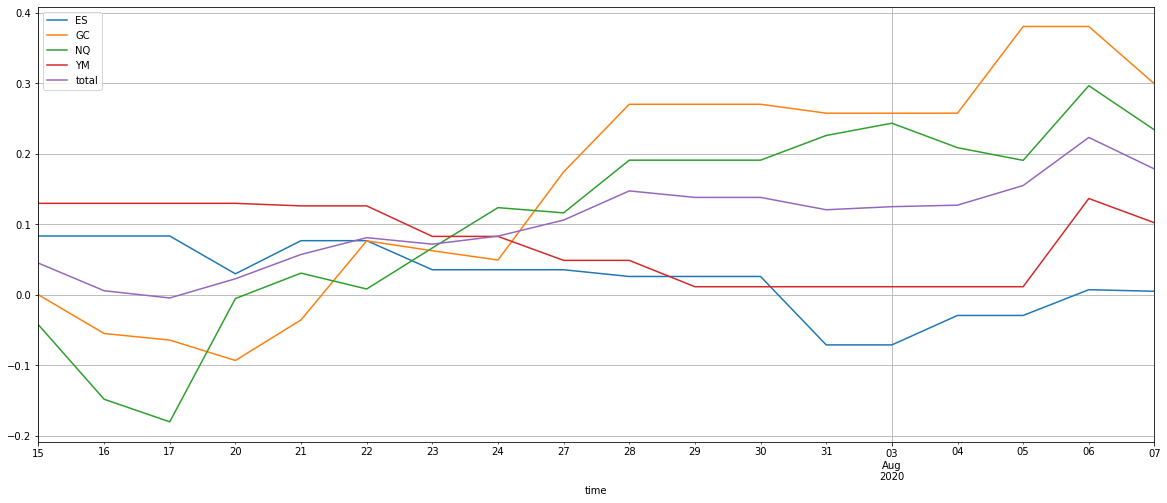

In [18]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

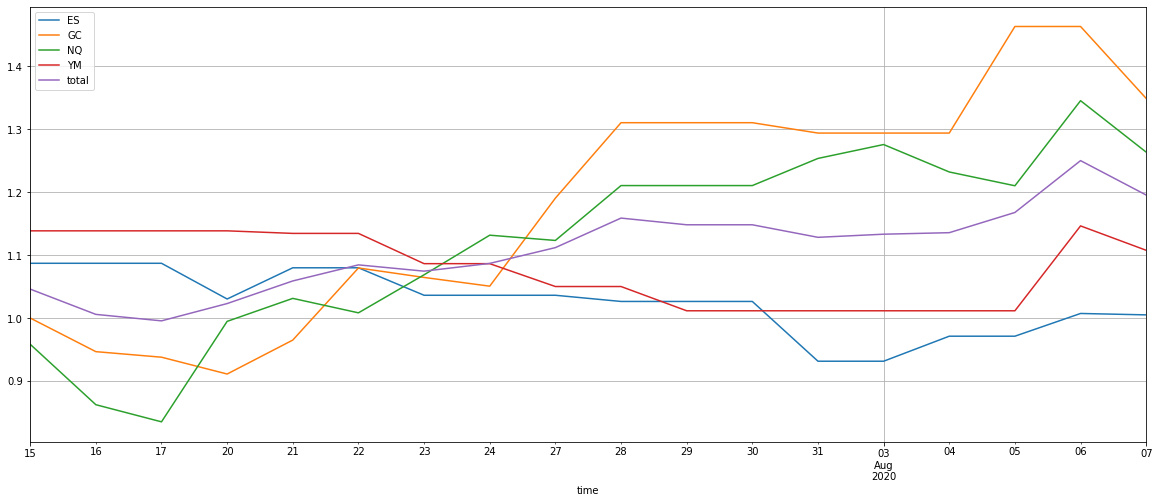

In [19]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [20]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,0.072633,64.915371,25.409295,3.180171,11.157910
Cumulative returns,0.005021,0.348738,0.263438,0.107570,0.195336
Annual volatility,0.621600,0.994571,1.084198,0.784560,0.470700
Sharpe ratio,0.408170,4.695452,3.528793,2.175087,5.553467
Calmar ratio,0.507576,729.985042,154.130711,28.515426,231.480713
Stability,0.623994,0.863900,0.835490,0.342151,0.843495
Max drawdown,-0.143098,-0.088927,-0.164855,-0.111525,-0.048202
Omega ratio,1.092096,2.597290,1.865642,1.813409,2.458211
Sortino ratio,0.594581,12.254551,7.520758,6.198788,11.103321
Skew,-0.182595,0.740691,0.814428,1.991422,0.010067


In [21]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-07-31,-6.86,29.38,25.35,1.15,12.82
2020-08-31,7.90,4.25,0.80,9.50,5.95


In [22]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES        1.0
GC       35.0
NQ       26.0
YM       11.0
total    20.0
dtype: float64

In [23]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-07-20 22:44:06.883,NQ,SELL,10934.00,5180.80
2020-08-06 10:49:16.287,YM,SELL,27017.00,3471.60
2020-07-22 01:17:38.552,GC,SELL,1860.40,3190.32
2020-08-05 00:35:18.941,GC,SELL,2036.30,2815.16
2020-07-21 13:30:08.703,GC,SELL,1837.40,2510.32
...,...,...,...,...
2020-07-20 01:50:23.866,ES,SELL,3196.25,-954.20
2020-07-20 15:28:02.995,GC,SELL,1816.80,-969.68
2020-07-29 12:14:40.103,YM,BUY,26370.00,-1003.40


In [24]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-08-06,0.037172,0.000000,0.111660,0.133267,0.070525
2020-07-15,0.086951,0.000000,-0.041694,0.138478,0.045934
2020-07-28,-0.009478,0.100648,0.077581,0.000000,0.042188
2020-07-21,0.048123,0.059194,0.036711,-0.003575,0.035113
2020-08-05,0.000000,0.130831,-0.017782,0.000000,0.028262
2020-07-20,-0.052202,-0.028497,0.191042,0.000000,0.027586
2020-07-22,0.000000,0.118659,-0.022251,0.000000,0.024102
2020-07-27,0.000000,0.133071,-0.007373,-0.033426,0.023068
2020-07-24,0.000000,-0.013033,0.058854,0.000000,0.011455
